# Salary Prediction
- [The Adult Salary Prediction dataset](https://archive.ics.uci.edu/ml/datasets/adult) consists of data from the 1994 US Census and the task is to predict whether a person earns `over $50K` a year (Class 1) or `less than $50K` a year (Class 0). The columns in the dataset are as follows:

|col name|description|
|:--|:--|
|age| continuous.|
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt| continuous.|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num| continuous.|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex| Female, Male.|
|capital-gain| continuous.|
|capital-loss| continuous.|
|hours-per-week| continuous.|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
|target| This is the target variable to be predicted. Class 1 for salary >50K and class 0 for salary <=50K|

- The goal of this project is to build and tune a model to predict the `target` column using AWS Sagemaker and deploy the model as a `Serverless Inference Endpoint`

## Tips: 
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or we can drop any?
- What ML task is this? Classification? Regression? Clustering?
- How to determine the best hyperparameters for the model?
- How to test if the model is deployed successfully?

In [1]:
import pandas as pd

cols = [
    "age", 
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "target"
]

In [2]:
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=cols)
test_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=cols, skiprows=1)

train_df["target"] = train_df["target"].apply(lambda x: 1 if ">50K" in x else 0)
test_df["target"] = test_df["target"].apply(lambda x: 1 if ">50K" in x else 0)

print(train_df.shape, test_df.shape)
train_df.head()

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## All the best!
Get started below...

In [3]:
big_test_df=test_df.sample(500_000,replace=True,ignore_index=True)

In [4]:
big_test_df.shape

(500000, 15)

In [5]:
import sagemaker
session = sagemaker.Session()
bucket = session.default_bucket()
print(bucket)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker-eu-north-1-058264519415


In [6]:
import os

# Specify the directory path
directory_path = r"C:\Users\Prakash Enerprener"

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Write the files locally
train_df.to_csv(os.path.join(directory_path, "train.csv"), index=False)
test_df.to_csv(os.path.join(directory_path, "test.csv"), index=False)
big_test_df.to_json(os.path.join(directory_path, "biggest.json"), orient='records', lines=True)



In [7]:
import os
import boto3
import sagemaker

# Initialize SageMaker session
session = sagemaker.Session()

# Get the default bucket
bucket = session.default_bucket()

# Specify the directory path
directory_path = r"C:\Users\Prakash Enerprener"

# Upload the files to the default SageMaker bucket
for file_name in ["train.csv", "test.csv", "biggest.json"]:
    file_path = os.path.join(directory_path, file_name)
    session.upload_data(file_path, bucket, file_name)



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [8]:
# Specify the file names
file_names = ["train.csv", "test.csv", "biggest.json"]

# Print the S3 paths of the files
for file_name in file_names:
    s3_path = os.path.join("s3://", bucket, file_name)
    print(f"S3 Path of {file_name}: {s3_path}")

S3 Path of train.csv: s3://sagemaker-eu-north-1-058264519415/train.csv
S3 Path of test.csv: s3://sagemaker-eu-north-1-058264519415/test.csv
S3 Path of biggest.json: s3://sagemaker-eu-north-1-058264519415/biggest.json


In [65]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.tuner import HyperparameterTuner, IntegerParameter, ContinuousParameter, CategoricalParameter
import boto3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [72]:
train_df=pd.read_csv(r'C:\Users\Prakash Enerprener/train.csv')
test_df=pd.read_csv(r'C:\Users\Prakash Enerprener/test.csv')


In [73]:
# Check for missing values
print("Train Data Missing Values:\n", train_df.isnull().sum())
print("Test Data Missing Values:\n", test_df.isnull().sum())

Train Data Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64
Test Data Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64


In [68]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [69]:
train_df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [14]:
!pip install sweetviz

In [15]:
import sweetviz as sw

                                             |          | [  0%]   00:00 -> (? left)


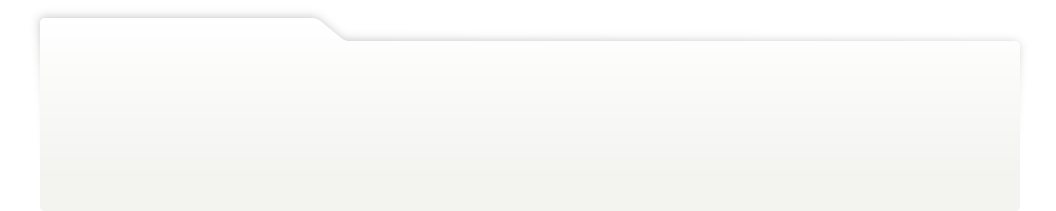
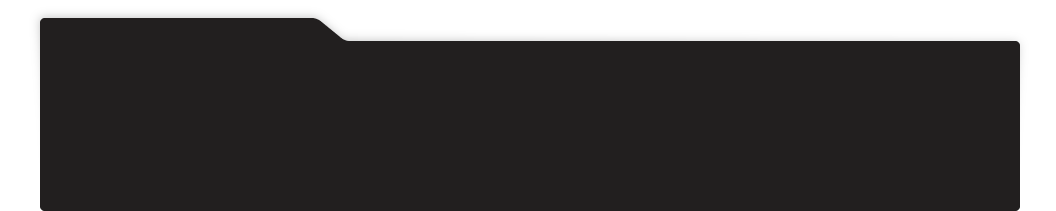
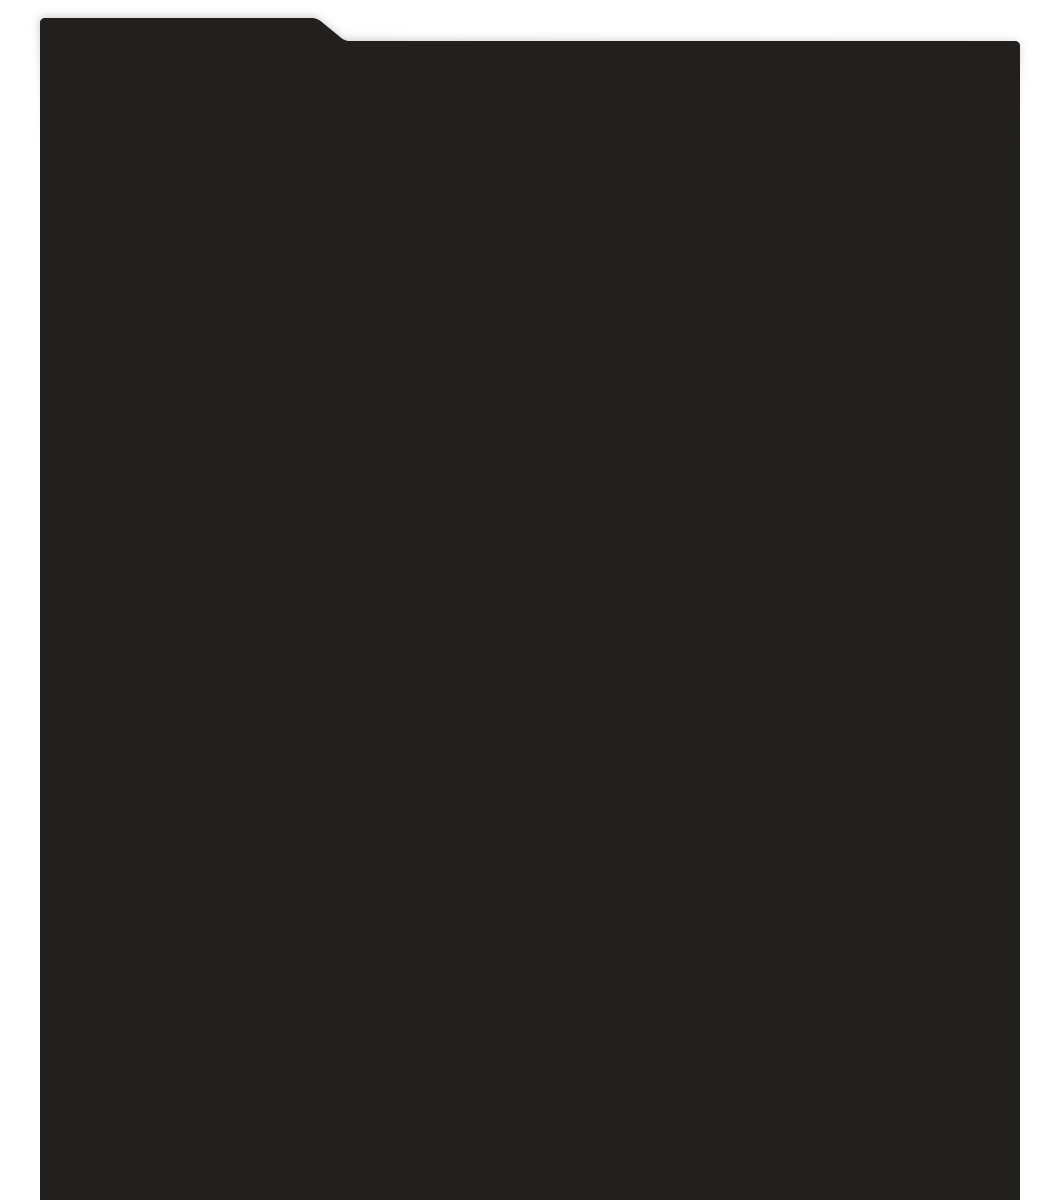
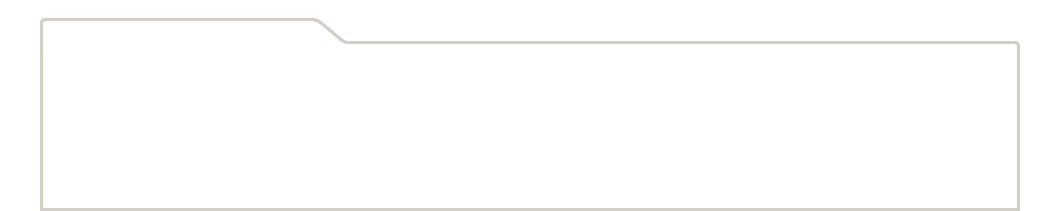
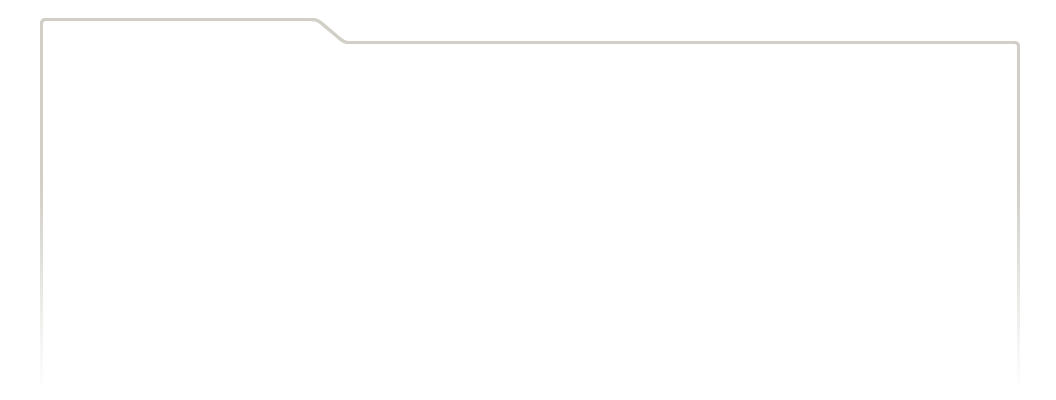
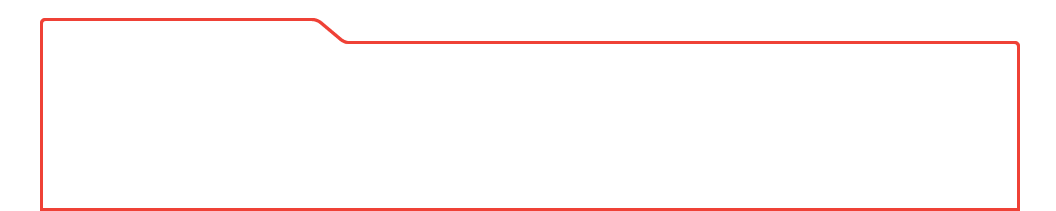
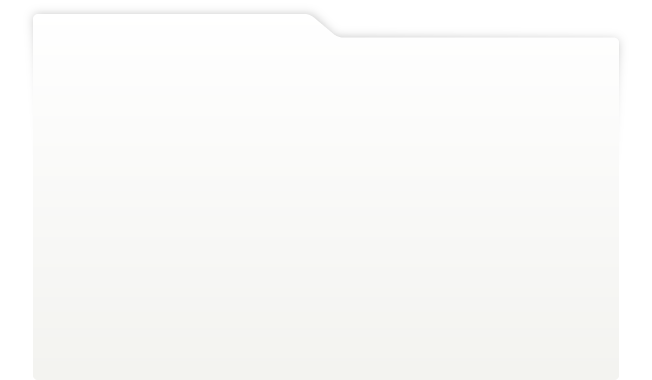
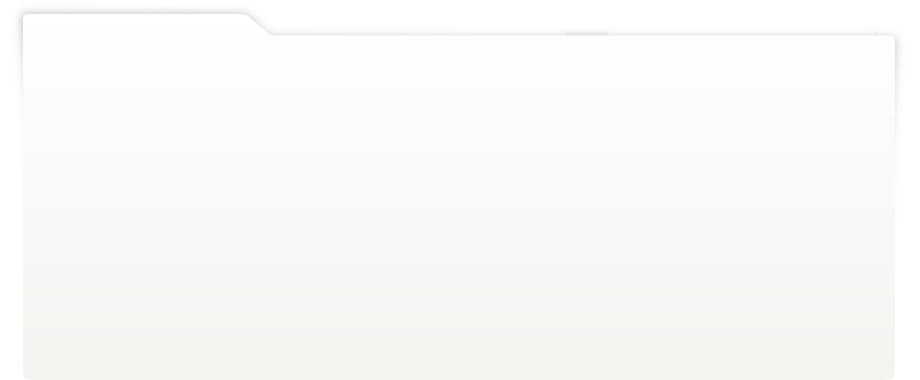
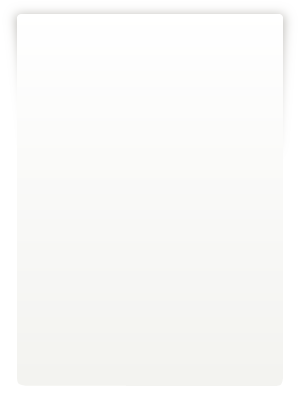
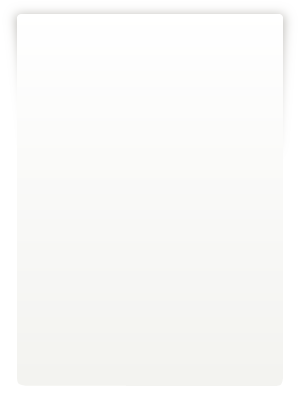
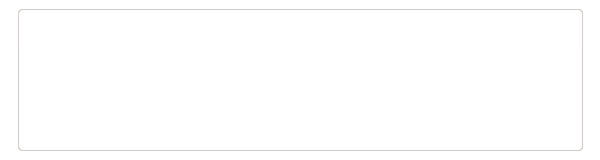
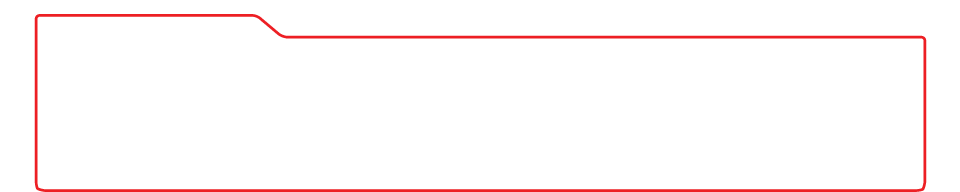
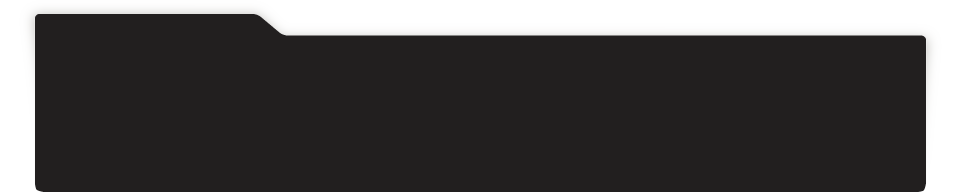
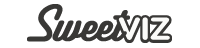
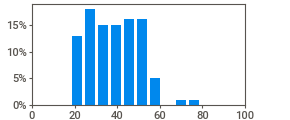
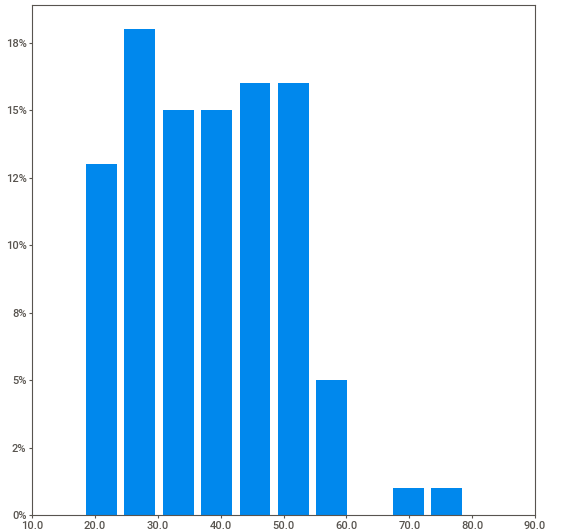
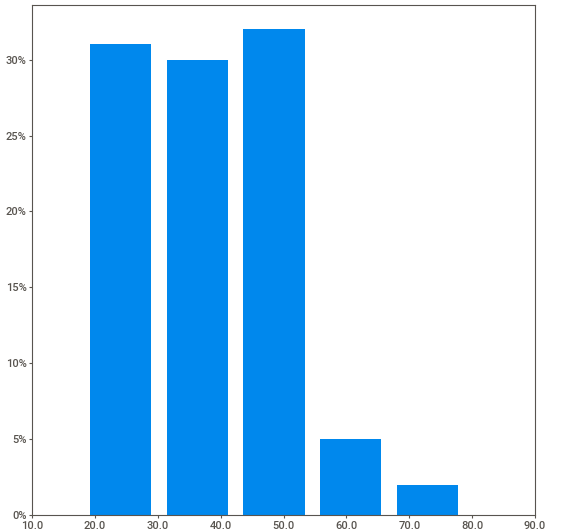
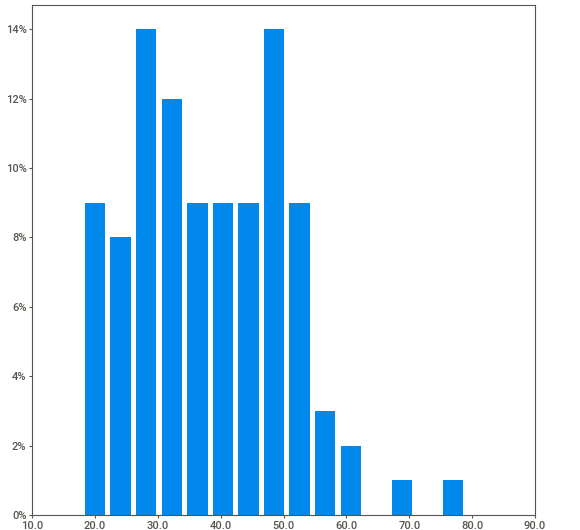
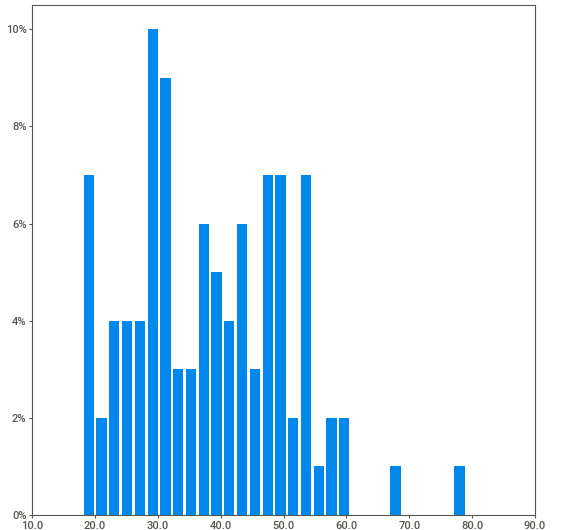
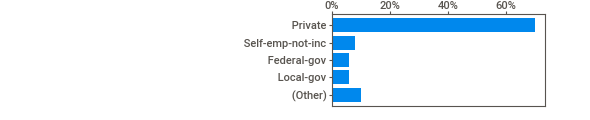
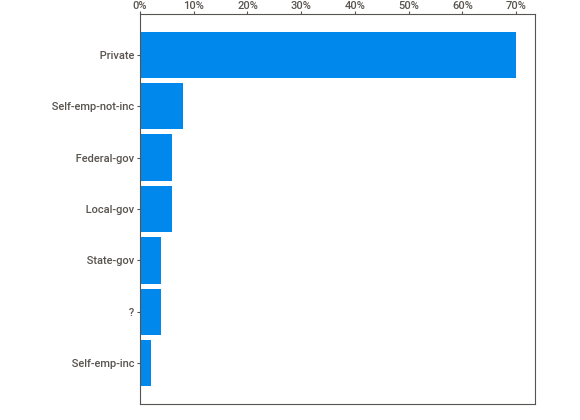
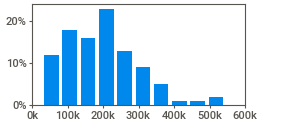
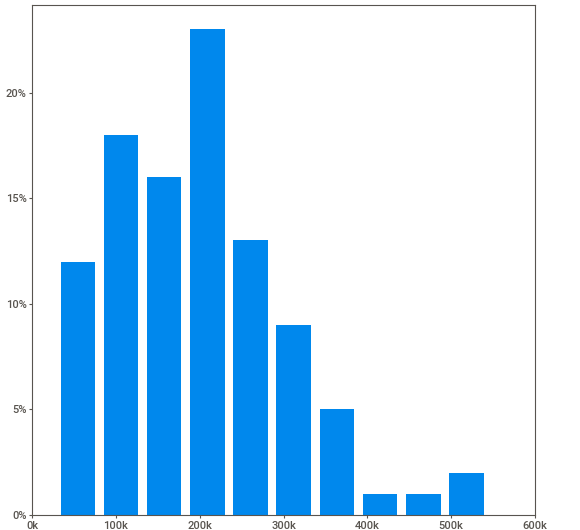
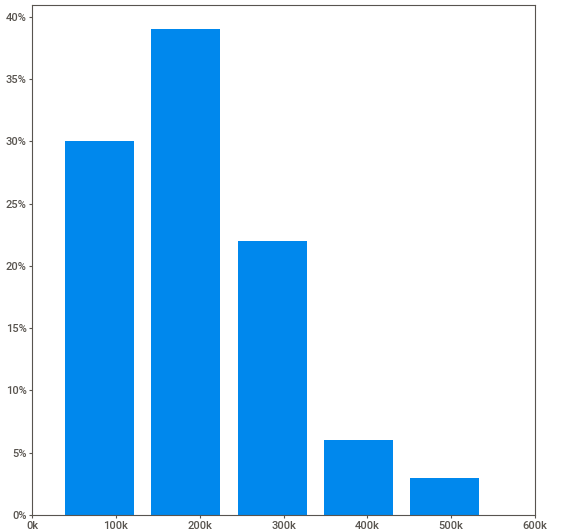
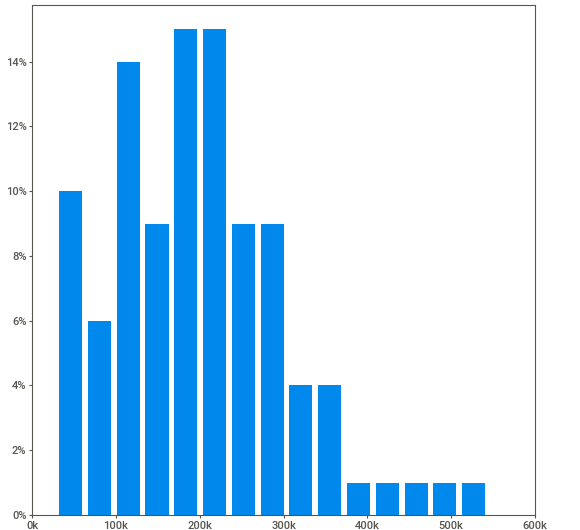
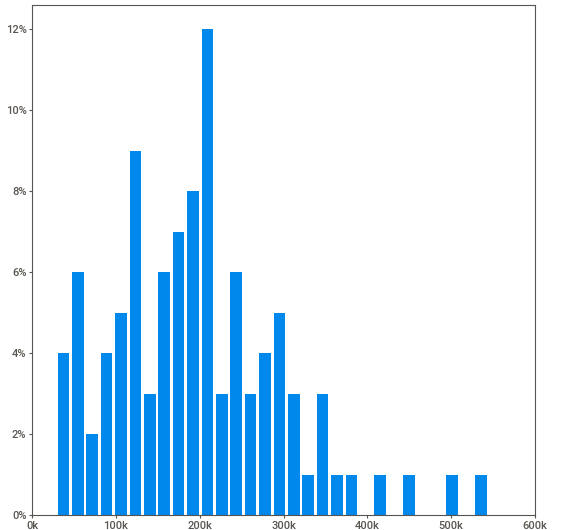
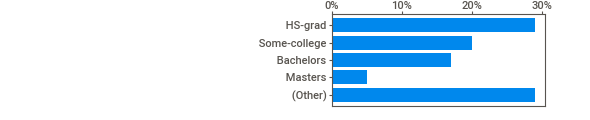
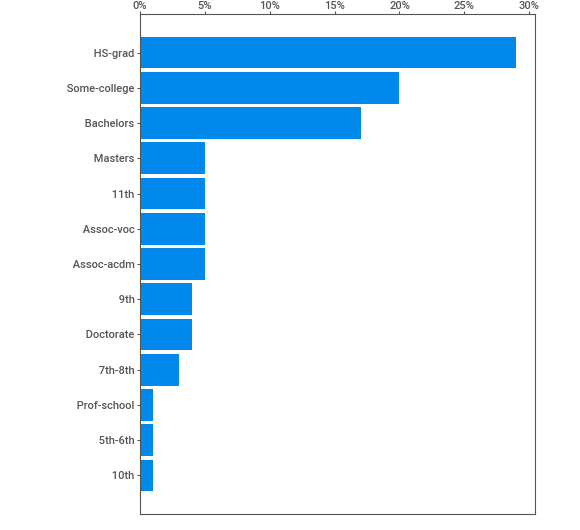
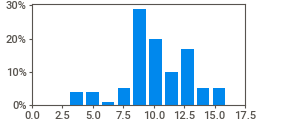
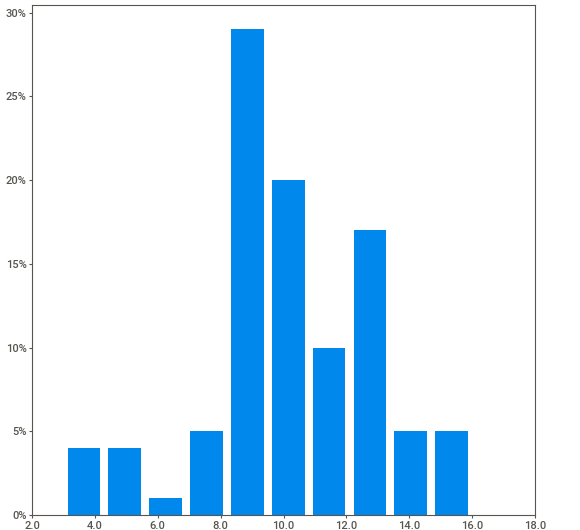
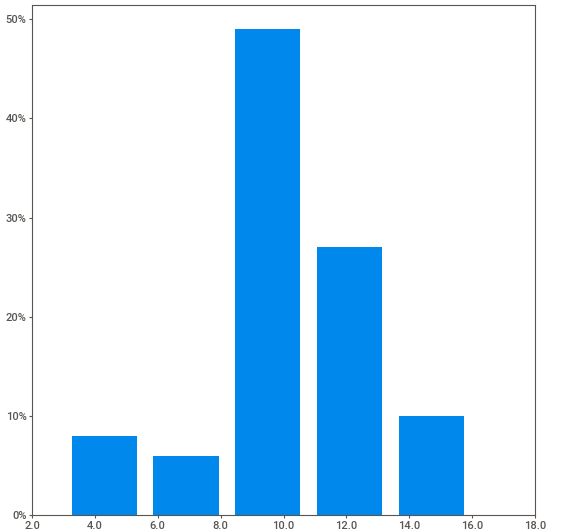
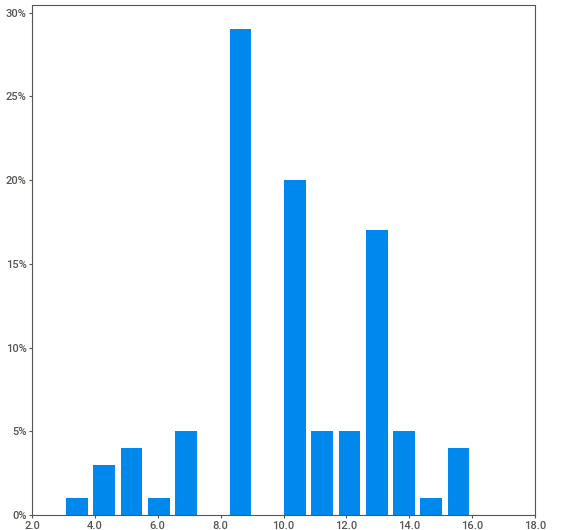
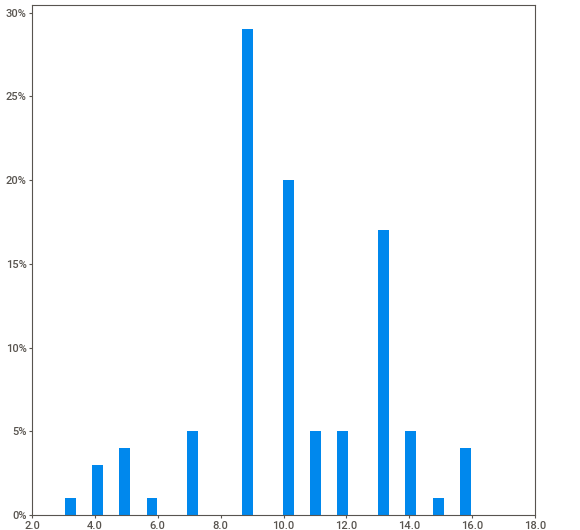
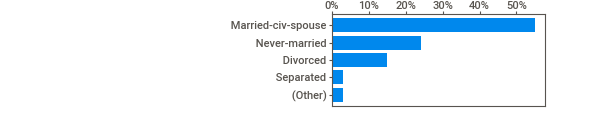
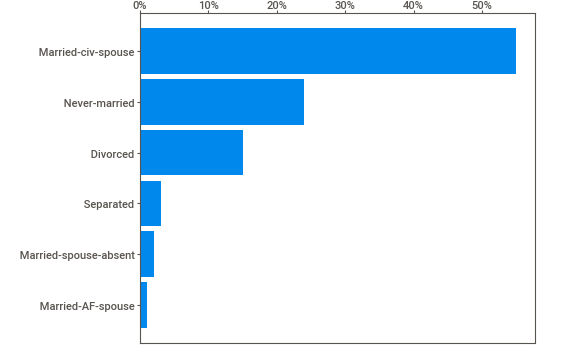
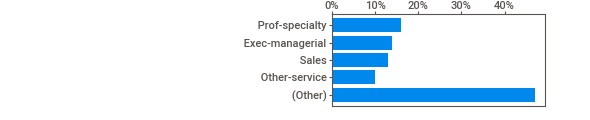
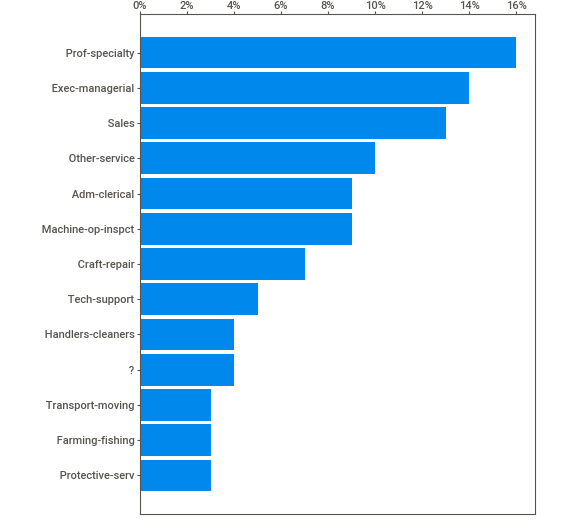
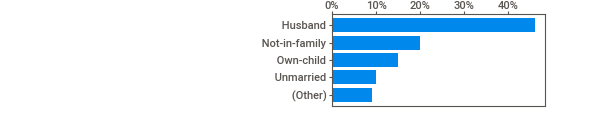
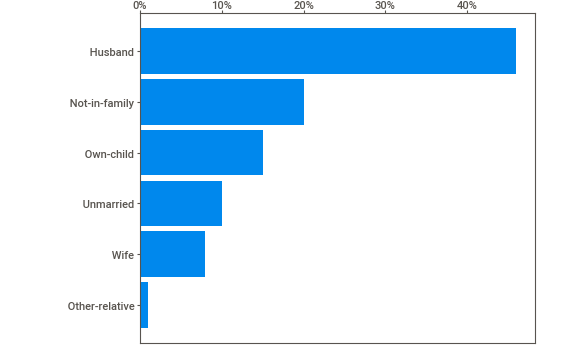
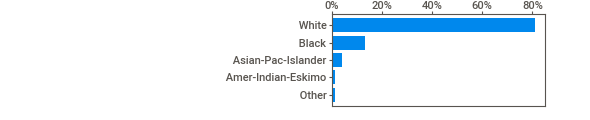
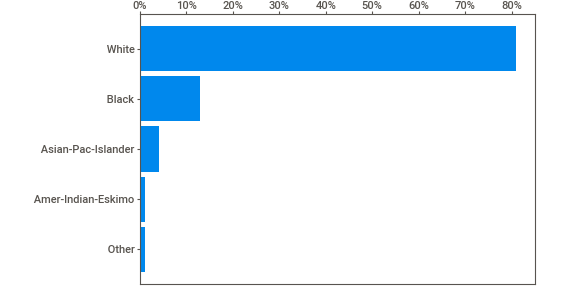
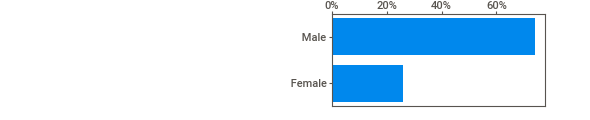
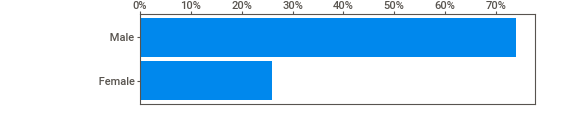
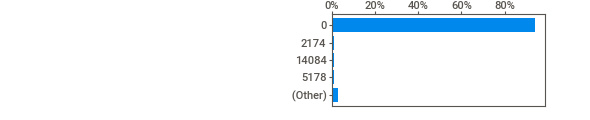
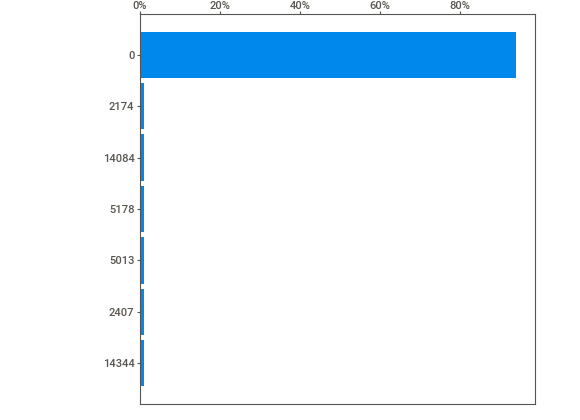
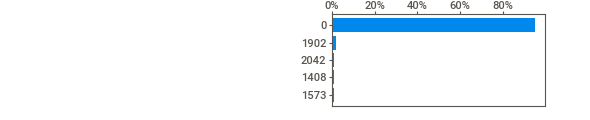
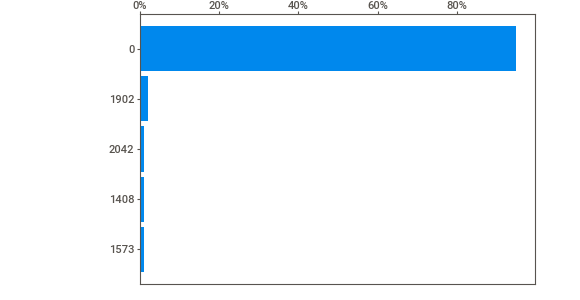
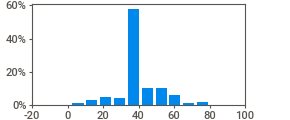
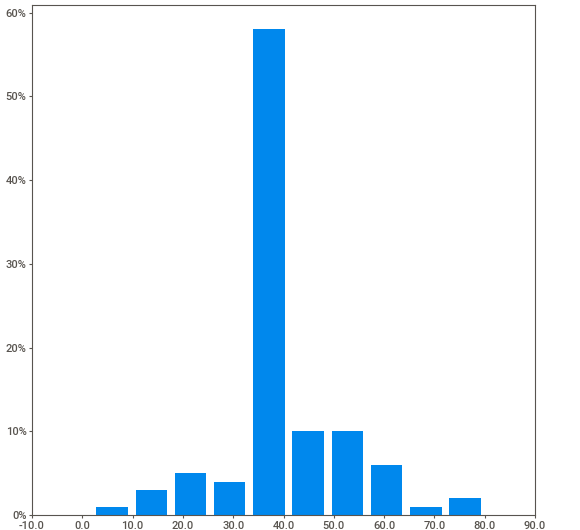
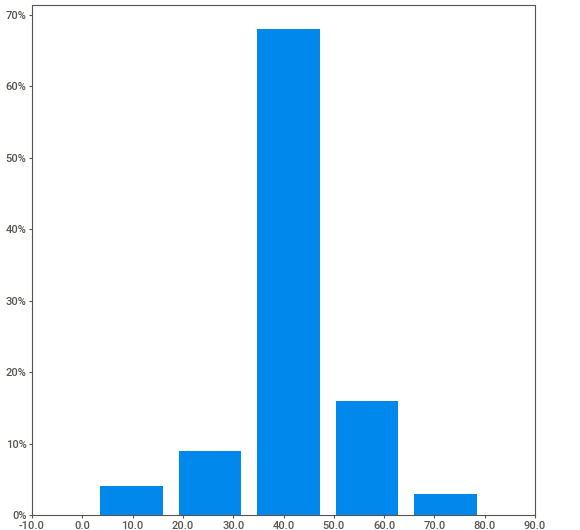
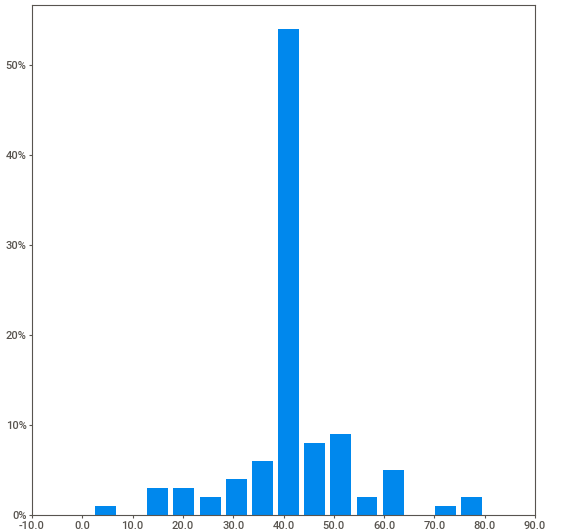
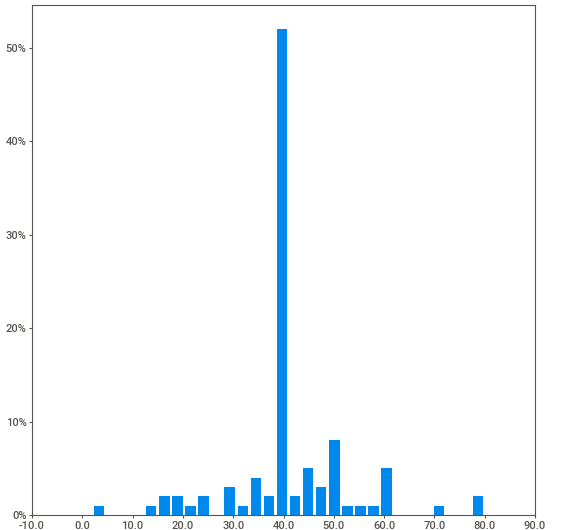
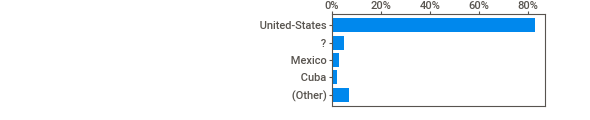
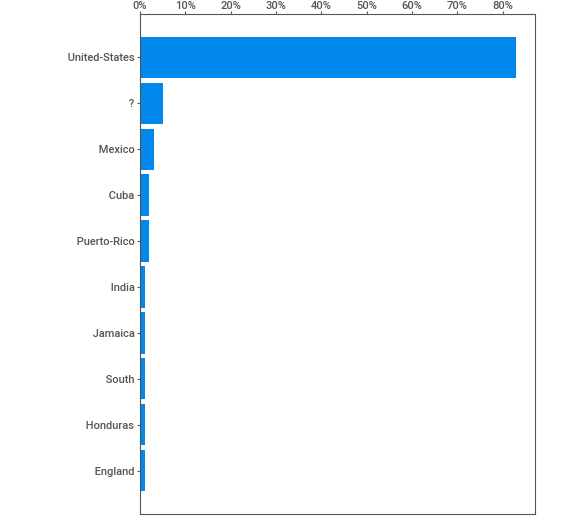
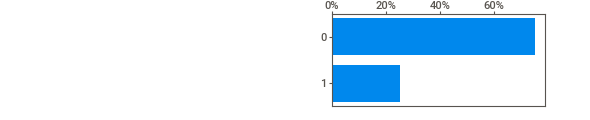
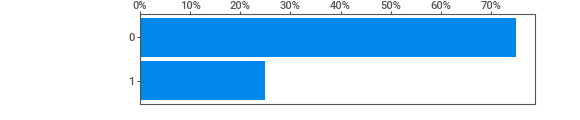
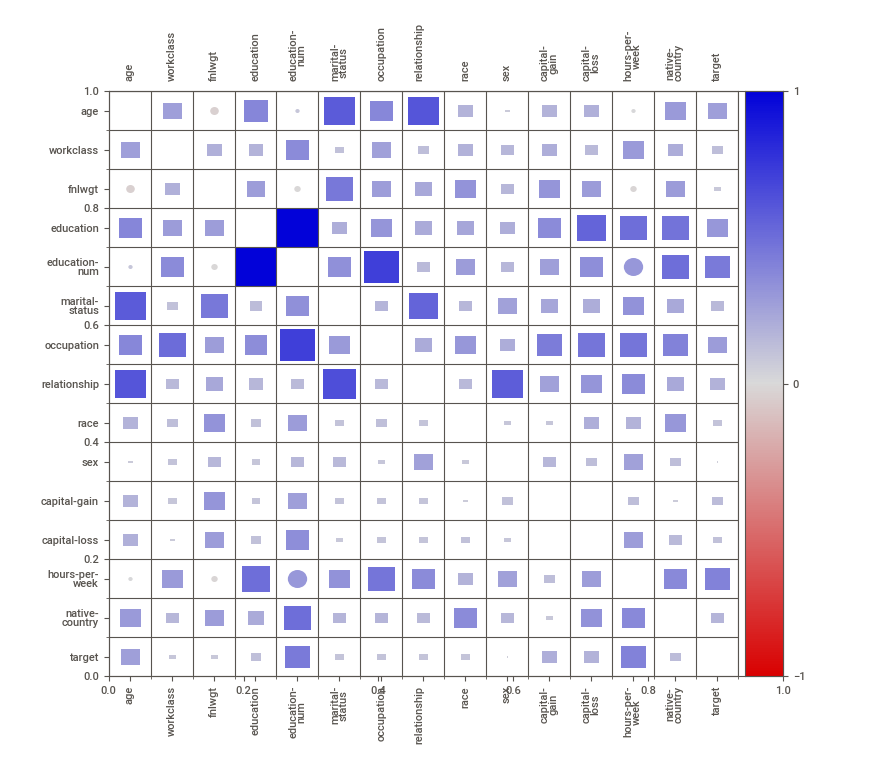
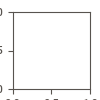

In [16]:
report=sw.analyze(train_df)
report.show_notebook()

In [81]:
# Determine which columns are relevant for prediction
relevant_columns = ['age', 'workclass', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
                    'capital-loss', 'hours-per-week', 'native-country', 'target']

In [82]:
# Select relevant columns from the dataset
train_df_selected = train_df[relevant_columns]
test_df_selected = test_df[relevant_columns]

In [83]:
len(train_df_selected)

32561

In [84]:
len(test_df_selected)

16281

In [78]:
# X = train_df.drop(columns=['target'])
# y = train_df['target']

In [85]:
    # Separate features and target variable
    X_train = train_df_selected.drop('target', axis=1)
    y_train = train_df_selected['target']
    X_test = test_df_selected.drop('target', axis=1)
    y_test = test_df_selected['target']


In [86]:
X_train.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [101]:
# Assuming train_df_selected is your DataFrame
columns_names = train_df_selected.columns.tolist()
print(columns_names)


['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']


In [102]:
 # Define the column
X_train_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_train_num = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [103]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [105]:
ohe=OneHotEncoder(drop='first')
sc=StandardScaler()

In [106]:
rfc=RandomForestClassifier()

In [107]:
# rfc.fit(transformed_data,y_train)

In [108]:
# pipeline=Pipeline()

In [109]:

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',sc,X_train_num),('encoder',ohe,X_train_cat)])

In [110]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rfc)])

In [111]:
# Fit the pipeline
pipeline_rfc_model=pipeline.fit(X_train, y_train)
pipeline_rfc_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier())])

In [112]:
# Evaluate the model
accuracy = pipeline_rfc_model.score(X_train, y_train)
print("Accuracy:", accuracy)

Accuracy: 0.976413500813857


In [113]:
accuracy = pipeline_rfc_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.844419875928997


In [114]:
%%writefile train.py

import pandas as pd
import argparse
import os
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_file_name = 'pipeline_model.joblib'

def main():

    # Arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--min_samples_split", type=float, default=0.05)
    parser.add_argument("--criterion", type=str, default='gini')
    args, _ = parser.parse_known_args()

    # Load the dataset
    train_df = pd.read_csv('s3://sagemaker-eu-north-1-058264519415/train.csv')
    test_df = pd.read_csv('s3://sagemaker-eu-north-1-058264519415/test.csv')

    # Drop unnecessary column
    train_df = train_df.drop('fnlwgt', axis=1)
    test_df = test_df.drop('fnlwgt', axis=1)

    # Define the columns
    cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
    num_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

    # Separate features and target variable
    X_train = train_df.drop('target', axis=1)
    y_train = train_df['target']
    X_test = test_df.drop('target', axis=1)
    y_test = test_df['target']

    # Preprocessing pipeline
    preprocessing_pipeline = ColumnTransformer([
        ("OneHotEncoder", OneHotEncoder(drop='first'), cat_columns),
        ("StandardScaler", StandardScaler(), num_columns)
    ])

    # Random Forest model
    rfc_model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        min_samples_split=args.min_samples_split,
        criterion=args.criterion
    )

    # Pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', rfc_model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred_train = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Train Accuracy: {train_accuracy:.4f}")

    y_pred_test = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Save the model
    model_save_path = os.path.join(args.model_dir, model_file_name)
    joblib.dump(pipeline, model_save_path)
    print(f"Model saved at: {model_save_path}")


if __name__ == "__main__":
    main()


Overwriting train.py


In [115]:
%%writefile requirements.txt
pandas
scikit-learn
fsspec
s3fs


Overwriting requirements.txt


In [116]:
# Train!!
from sagemaker.sklearn.estimator import SKLearn
from sagemaker import get_execution_role

SKLearn_estimator=SKLearn(
    base_job_name="rfc-pipeline-run",
    framework_version="0.23-1",
    entry_point="train.py",  # Corrected: Set to the script filename
    dependencies=["requirements.txt"],
    hyperparameters={
        "n_estimators":50,
        "min_samples_split":0.05,
        "criterion":"gini"
    },
    instance_count=1,
    instance_type="ml.m5.large",
    use_spot_instances=True,
    max_wait=600,
    max_run=600,
    role=get_execution_role()
)

# Launch Training job
SKLearn_estimator.fit()


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: rfc-pipeline-run-2024-04-09-15-10-53-774


Using provided s3_resource
2024-04-09 15:10:54 Starting - Starting the training job...
2024-04-09 15:11:09 Starting - Preparing the instances for training...
2024-04-09 15:11:40 Downloading - Downloading input data...
2024-04-09 15:12:06 Downloading - Downloading the training image...
2024-04-09 15:12:48 Training - Training image download completed. Training in progress..2024-04-09 15:12:53,512 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-04-09 15:12:53,517 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-04-09 15:12:53,573 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-04-09 15:12:53,762 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/miniconda3/bin/python -m pip install -r requirements.txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.0/988.0 kB 25.

KeyboardInterrupt: 

In [64]:
import boto3
import json

runtime = boto3.client('sagemaker-runtime')

# Sample input data
sample_data = {
    "age": 25,
    "workclass": "Private",
    "education": "Bachelors",
    "marital-status": "Never-married",
    "occupation": "Tech-support",
    "relationship": "Not-in-family",
    "race": "White",
    "sex": "Male",
    "capital-gain": 0,
    "capital-loss": 0,
    "hours-per-week": 40,
    "native-country": "United-States"
}

# Convert to JSON format
payload = json.dumps(sample_data)

# Specify the endpoint name
endpoint_name = 'your-endpoint-name'

# Invoke the endpoint
response = runtime.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/json', Body=payload)

# Get the predicted class
result = json.loads(response['Body'].read().decode())
print("Predicted Class:", result)


ValidationError: An error occurred (ValidationError) when calling the InvokeEndpoint operation: Endpoint your-endpoint-name of account 058264519415 not found.

yes my coding part is correct but aws sage maker supporting problome